In [14]:
import logging, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from apsopt.core.optimizer import Optimizer
from apsopt.core.optimizer import try_parse_dict

logger = logging.getLogger(__name__)

In [15]:
with open('20231112T232057_sobo_inj_eff_dump.json','r') as f:
    data = json.load(f)
kwargs = try_parse_dict(data, skip_evaluator=True)

In [16]:
kwargs

{'generator': APSUpperConfidenceBoundGenerator(supports_batch_generation=True, supports_multi_objective=False, vocs=VOCS(variables={'SVD0': [-0.4, 0.4], 'SH1': [-0.2974936815, 0.2974936815], 'SH3': [-0.08782662614999999, 0.08782662614999999], 'SH4': [-0.23731351065, 0.23731351065], 'SL1': [-0.19907409075000002, 0.19907409075000002], 'SL2': [-0.53516882175, 0.53516882175], 'SL3': [-0.44191290915000003, 0.44191290915000003]}, constraints={}, objectives={'EFF': 'MAXIMIZE'}, constants={}, observables=[]), data=None, model=None, n_monte_carlo_samples=128, turbo_controller=None, use_cuda=False, gp_constructor=StandardModelConstructor(name='standard', use_low_noise_prior=False, covar_modules={}, mean_modules={}, trainable_mean_keys=[]), numerical_optimizer=APSLBFGSOptimizer(name='APSLBFGS', n_raw_samples=64, n_restarts=10, max_iter=2000, sequential=True), max_travel_distances=None, fixed_features=None, computation_time=None, log_transform_acquisition_function=False, n_candidates=1, beta=1.0),

In [17]:
opt = Optimizer(**kwargs)

In [18]:
opt.data;

Text(0, 0.5, 'Objective (EFF)')

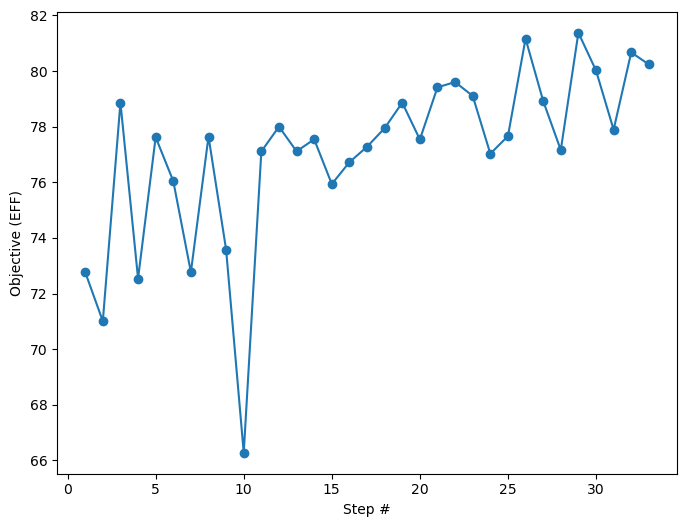

In [19]:
fig,ax = plt.subplots(1,1,squeeze=False,figsize=(8,6))
df = opt.data
ol = ['EFF']

ax[0,0].plot(df.loc[:,ol[0]],marker='o')
ax[0,0].set_xlabel('Step #')
ax[0,0].set_ylabel('Objective (EFF)')

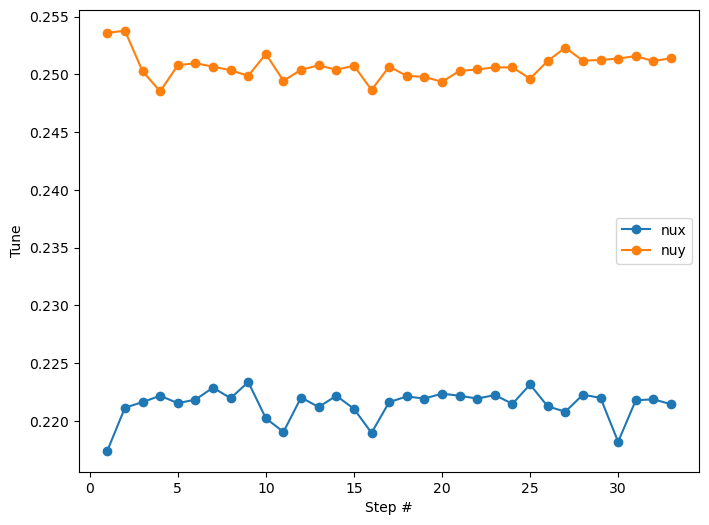

In [20]:
fig,ax = plt.subplots(1,1,squeeze=False,figsize=(8,6))
df = opt.data

ax[0,0].plot(df.loc[:,'_nux'],marker='o', label='nux')
ax[0,0].plot(df.loc[:,'_nuy'],marker='o', label='nuy')
ax[0,0].set_xlabel('Step #')
ax[0,0].set_ylabel('Tune')
ax[0,0].legend()